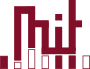 Department of Artificial Intelligence and Systems Engineering, ©2024, BME-MIT, Mihaly Vetro, Dr. Gabor Hullam  
# **VIMIAC16 - Artificial Intelligence**
## 2024 Fall Semester
## **LAB 1 - Search**


# Introduction and Homework Material

## Objectives

The goal of this lab is to present search algorithms, a widely used problem-solving method in the field of AI, in a practical way through their own implementation.

Search is used in many areas: the most obvious and most intuitive problem that can be solved in this way is route planning on a map, so we will also be looking for a path on a map during the lab. However, much more complex and general problems can also be traced back to search: during planning, it is possible to search in the space of plans, in the field of logical proofs, we can search for new knowledge starting from known facts or search for a proof of an assertion following the basic rules of logic, and the list could go on.

## General operation of search algorithms

## The problem space

We call the space where we formulate the problem to be solved the problem space. In a map search, this is the map itself, while in a search for a logical derivation, the set of statements and the set of available operations constitute the problem space.

The problem space can be finite in size, as in the case of a map, or it can be infinite in size, as in logical derivations (since if logical inversion is a usable operation, then we can invert any logical statement an infinite number of times without pushing the boundaries of the problem space).

It is important to see that even if the problem space itself is finite, searches run on it can still run for an infinite amount of time: if a search is prone to backtracking to a previously visited state without detecting it, then everything is given for the goal to never be reached!

## The search space

The problem space alone is not enough for the operation of search algorithms, as we need to store additional data during the execution of the search that do not belong to the problem, but to the current run of the search: such as how we reached a certain state in the problem space through a chain of previous states, since this will be the solution formulated in the problem space!

The algorithms always run in a search space. It is important to note that even in the case of a search problem on a map, the space of reality represented by the map, and the search space, differ from each other! The former contains objects that can be described by spatial coordinates, while the latter is an abstract graph representation of reality.

During the search, the algorithms always work in the search space, although the individual points of the search space can generally be matched to certain points of the real space, the matching is often not one to one: for example, if there are multiple paths to a real-world spatial point, then the same point of the problem space can appear in multiple different points of the search space, and the task of the search algorithm is to recognize their identity!

## The goal test

The task of the goal test during the execution of the search algorithm is to decide whether a currently visited node is a goal. If so, the search retraces the path to the given state and then stops.

In the simplest searches, the goal state can be explicitly defined, for example, by clicking on a point on the map while searching, we can say that this point is the goal. In this case, a simple comparison is the goal test, which signals if we have entered the goal state during the search.

In more complex searches, there may be multiple or even an infinite number of goal states. In this case, the goal test is a much more complex function, which, however, still returns a true value when a state meets the requirements for the goal.

## General execution of searches

The first step of search algorithms is always to set the starting state. After that, the search iteratively processes more and more states in the search space until the goal test returns a true value for the currently selected state, or the solvable nodes run out. In the former case, the algorithm has found a path to a goal state, while in the latter case, the search ends unsuccessfully.

Search algorithms fundamentally differ in that they select the next node to be expanded from the potentially selectable nodes based on what principles. The general framework of searches will be given in the lab, all that needs to be implemented is this node selection logic based on different considerations, this will make it possible to quickly and easily implement different search algorithms.

##Problem space used in the lab
In this lab, we will be working with a simple map that depicts the area around the BME I building and the 11th district. The map was filtered from the OpenStreetMap database under the name 11ker.osm. Using different search algorithms, we will search for a path from the I building to the Schönherz dormitory, but at the end of the lab, in the independent experimental part, a path can be searched to any other point.

##Google Colab environment
The lab report was created in the Google Colab environment. In this environment, documents can be edited that contain both static information (in the form of text and images) and code snippets written in Python. The code snippets can be edited within the document and run as many times as desired. The output of the running program is visible below the code block.

The code snippets related to map handling were implemented in a source code file named Map.py in order to focus on the essential tasks within the scope of the report.

##Lab tasks
Downloading the necessary files
First, run the following code block by moving your mouse over the "[ ]" section in the upper left corner and then clicking the Run button that appears.

In [ ]:
!wget -O Map.py https://share.mit.bme.hu/index.php/s/r82NPxrbgbP69cX/download/Map.py
!wget -O 11ker.osm https://share.mit.bme.hu/index.php/s/kbr8QNqy3SRXHGn/download/11ker.osm

--2024-09-18 12:41:53--  https://share.mit.bme.hu/index.php/s/r82NPxrbgbP69cX/download/Map.py
Resolving share.mit.bme.hu (share.mit.bme.hu)... 152.66.252.20
Connecting to share.mit.bme.hu (share.mit.bme.hu)|152.66.252.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7130 (7.0K) [text/x-python]
Saving to: ‘Map.py’

Map.py              100%[===================>]   6.96K  --.-KB/s    in 0s      

2024-09-18 12:41:54 (59.7 MB/s) - ‘Map.py’ saved [7130/7130]

--2024-09-18 12:41:54--  https://share.mit.bme.hu/index.php/s/kbr8QNqy3SRXHGn/download/11ker.osm
Resolving share.mit.bme.hu (share.mit.bme.hu)... 152.66.252.20
Connecting to share.mit.bme.hu (share.mit.bme.hu)|152.66.252.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1842715 (1.8M) [application/octet-stream]
Saving to: ‘11ker.osm’

11ker.osm           100%[===================>]   1.76M   898KB/s    in 2.0s    

2024-09-18 12:41:57 (898 KB/s) - ‘11ker.osm’ saved [1842715/1842715]

As a result of the above block, a Python session started, the memory and storage usage of which can be seen in the "RAM" and "Disk" graphs in the upper left corner of the window. The two referenced map files and the Map.py source code have been downloaded, so in the following block written in Python, we can load and display the map.

##Displaying the map

Run the following code snippet to make the map points (blue dots) and the roads between them (black lines) visible!

Translation of the Python code snippet:

Reading XML file... done.
Parsing locations... 7281 locations loaded.
Parsing roads... 1955 items loaded.


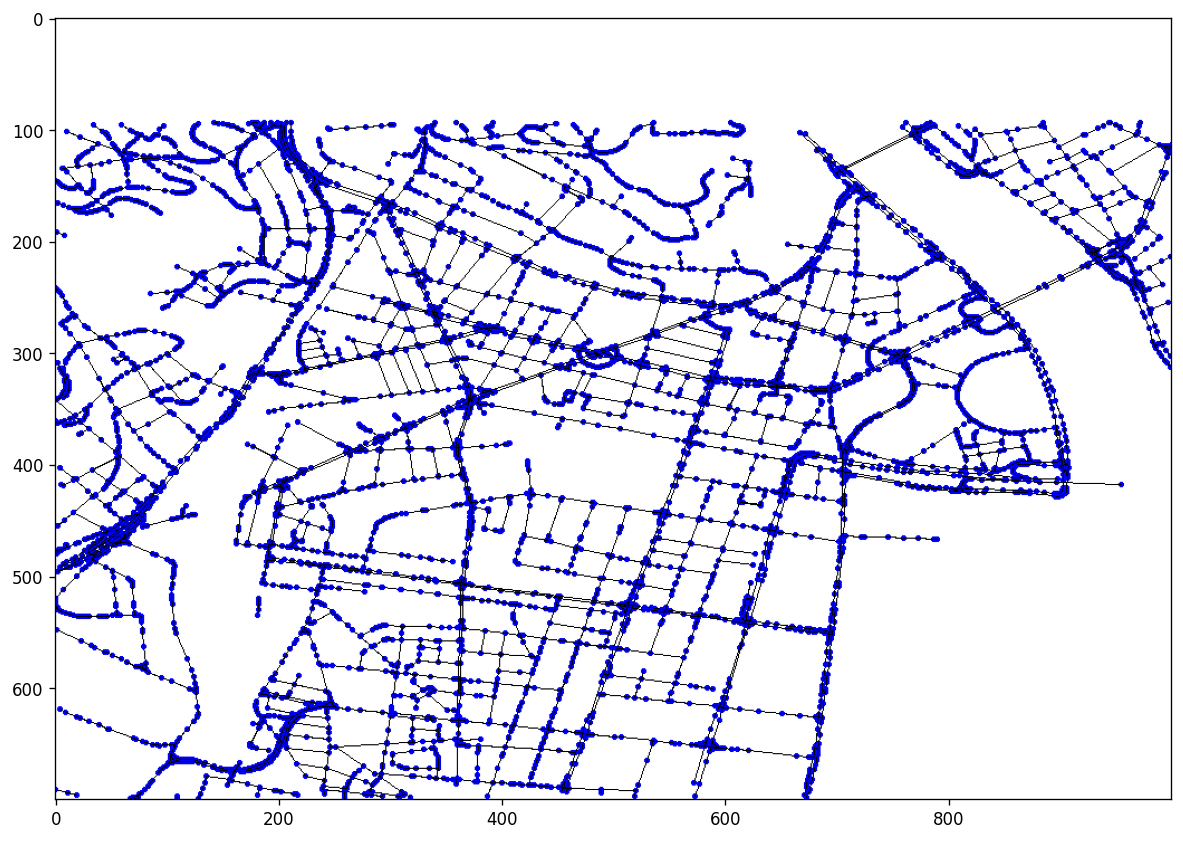

In [ ]:
from Map import Map
import math
import random

map = Map('11ker.osm')
map.show()

The above code snippet loads and displays the 11ker.osm file. Identify the location of the BME I building and the Schönherz dormitory on the maps without labels! If you need help with this, use the Google Maps: https://www.google.com/maps/@47.4721234,19.0510429,16z interface!

In the next step, you need to familiarize yourself with some code snippets related to the search space.

#Implementation of search algorithms
##Implementation of the search space
The representation of the problem space is solved by the Map and Location classes downloaded in the Map.py file, so we will not deal with them here. We will need a SearchNode class to build the graph in the search space, which will hold the nodes of the search space. Each node will have the following attributes:

location: A point defined in the problem space, which is represented by this node in the search space

parent: The SearchNode in the search space from which we reached the current SearchNode by expanding it

cost: The total cost of the path from the starting point to this point (in this case, the length of the path so far)

Interpret and then run the following code snippet, defining the SearchNode class:

In [ ]:
# SearchNode represents a node in the search tree
class SearchNode:
    # Set location, parent node and summed cost to this node
    def __init__(self, location, parent, cost):
        self.location = location
        self.parent = parent
        self.cost = cost

    # Convert the node to string (the parent id is also displayed when present)
    def __str__(self):
        if self.parent != None:
            return '<location={}, parent={} >'.format(self.location.id,self.parent.location.id)
        return '<location={}>'.format(self.location.id)

    # Node equality is defined by the location on the map represented by the node
    def __eq__(self, other):
        if (other == None):
            return False
        return self.location == other.location

The general search algorithm operation described briefly in the introduction will be recorded in a much more formal implementation form below. The operation of the SearchFrame implemented here is completely general, it is the same for all algorithms implemented during the lab. The algorithm implementations themselves will be placed in the NodeSelector classes implemented as tasks later.

During operation, the framework maintains two lists:

* openList: This list contains the points of the search space that are waiting to be expanded.
* closedList: This list contains the points of the search space that we have visited once.

The search is reset by the resetSearch function:

* It clears the contents of openList and closedList and any other related data structures.
* After that, it adds the point corresponding to the starting node to the openList in the search space.


The search is executed by the step function by taking the number of steps given as a parameter. The operation of step is as follows:

* If there are no more nodes in openList, then the search ends in failure.
* If there is at least one node in openList, then we call the active nextNodeSelector.nextNode function, which selects a node from openList to be expanded according to the currently implemented search method.
* If the selected node is a goal node, then we are done, we return the path to it and exit.
* If the selected node is not a goal, then we add all of its neighbors to openList that are not yet in openList or closedList.
* Finally, we remove the node that has just been processed from openList and add it to closedList.

Run through the following, well-commented code snippet, and understand its operation! If you have any questions, please contact the lab instructor! If everything is clear, then run the block to create the SearchFrame class!

In [ ]:
# The framework running the algorithms
class SearchFrame:
    map = None                  # The map the search is running on
    start = None                # A single node representing the start to search from
    targets = []                # Multiple target nodes all equally accepted as a valid target

    openList = []               # Search nodes waiting for being selected are on the open list
    closedList = []             # Search nodes already explored are on the closed list
    pathFound = []              # The path the search finds from the start node to one of the target nodes

    nextNodeSelector = None     # The next node selection logic, this class determines the type of search we are running
    verbose = False             # By default do not print to console every node selected
    heurErrorRatio = 0          # Amount of error of heuristics calculations


    # Set the map to work on
    def __init__(self, map):
        self.map = map

    # Set start node, add to the open list and set color to red
    def setStart(self, start):
        self.start = self.map.locations.get(start)
        self.openList.clear()
        self.openList.append(SearchNode(self.start,None,0))
        self.map.setLocationAnnotation(self.start,1)
        self.stepCount = 0

    # Add new location to the target list and set display color to green
    def addTarget(self, target):
        newTarget = self.map.locations.get(target)
        self.targets.append(newTarget)
        self.map.setLocationAnnotation(newTarget,2)


    # Reset the search framework before restarting the search
    def resetSearch(self):
        # Reset internal lists
        self.openList.clear()
        self.closedList.clear()
        self.pathFound.clear()

        # Reset annotations displayed on the map
        self.map.clearAnnotations()

        # Add start node to openList
        self.openList.append(SearchNode(self.start,None,0))
        self.map.setLocationAnnotation(self.start,1)

    # Clear all prevously set target
    def clearTargets(self):
      self.targets.clear()

    # Calculate heuristic value for the given location
    def heur(self, location):
        # Calculate the heuristic value against all targets and return the smallest value
        minValue = -1
        for target in self.targets:
            # Euclidean distance is used as an acceptable heuristic in this flat world problem
            currentValue = math.sqrt(math.pow(location.lat-target.lat,2)+math.pow(location.lon-target.lon,2))
            if minValue == -1 or minValue>currentValue:
                minValue = currentValue
        # Convert the results into meters (road length in the OSM map are in meters)
        meterValue = minValue*100000

        # Add white noise to the heuristic value if set so
        if self.heurErrorRatio > 0:
          errorValue = meterValue*self.heurErrorRatio*(random.random()*2-1)
          meterValue = meterValue + errorValue
        return meterValue

    # Run the given number of steps of the present search algorithm
    def step(self, stepNumber = 1):
        for i in range(0,stepNumber):
            self.stepCount = self.stepCount + 1
            if len(self.openList) == 0:
                # No more candidates, no path found from start to target.
                print('Openlist is empty. Giving up.')
                return

            # Select the next node to explore
            selectedNode = self.nextNodeSelector.nextNode(self.openList, self.closedList)

            # In verbose mode print selected node to console
            if self.verbose:
                print('Next node: {}'.format(selectedNode))

            # If something goes wrong in the nextNodeSelector, let's interrupt
            if selectedNode == None or selectedNode not in self.openList:
                print('The NextNodeSelector returned an invalid node: {}'.format(selectedNode))
                return

            # If the selected node is a target, the path is just found from start to target
            if selectedNode.location in self.targets:
                print('Target {} reached in {} steps and {} cost.'.format(selectedNode.location.id, self.stepCount, selectedNode.cost))
                # Track back the path from the found target to the start to build and display the found path
                while selectedNode.parent != None:
                    self.pathFound.append(selectedNode.parent)
                    self.map.setLocationAnnotation(selectedNode.location,5)
                    selectedNode = selectedNode.parent
                # The search can terminate now
                break

            # Transferring the selected node from openlist to closedlist
            self.openList.remove(selectedNode)
            self.closedList.append(selectedNode)
            self.map.setLocationAnnotation(selectedNode.location,4)

            # Adding all neighbours to the openlist
            for road in selectedNode.location.roads:
                otherEnd = SearchNode(road.endLocation,selectedNode,selectedNode.cost+road.length)
                if otherEnd in self.openList:
                    # Skipping: already in openlist
                    continue;
                if otherEnd in self.closedList:
                    # Skipping: already in closedlist
                    continue;
                self.openList.append(otherEnd)
                self.map.setLocationAnnotation(road.endLocation,6)
        # Display the map after the given number of steps or if the algorithm terminates
        self.map.show()

Create an instance of the framework, set the I building as the starting point and the Schönherz dormitory as the target!

In [ ]:
search = SearchFrame(map)
search.resetSearch()
search.setStart("305572355")
search.addTarget("60488184")

## Implementing breadth-first search
Breadth-first search always chooses the node from openList that was added the earliest. Since openList is implemented as a simple indexed list, we can implement this behavior by always returning the first element of openList in the BFSNodeSelector class!

This behavior is implemented by the following simple code snippet. The bottom three lines reset the search, set a new instance of the BFSNodeSelector as the search strategy, and run the search for a maximum of 1000 steps! Run the following block and evaluate the behavior of breadth-first search!

In [ ]:
class BFSNodeSelector:
    def nextNode(self, openList,closedList):
        return openList[0]


search.resetSearch()
search.nextNodeSelector = BFSNodeSelector()
search.step(1000)

The colors in the above image have the following meanings:

* Purple: The points of the found path
* Yellow: The elements of closedList
* Cyan: The elements of openList
* Blue: The additional points of the map that were not visited during the search.

Based on the execution of the algorithm, we can conclude the following:

* Breadth-first search expands a lot of nodes in order to ensure completeness and optimality.
* The search (like any uninformed search) does not strive for the goal point, it expands a lot of nodes in every direction in the space.
* In the case of breadth-first search, the required storage capacity (due to the storage of many expanded nodes) is a problem earlier than the execution time.


##Implementing depth-first search

Breadth-first search has the advantage of being complete and optimal, but the required storage capacity is a strong limiting factor. Depth-first search puts everything on minimizing storage capacity, but this means sacrificing the two previous attractive properties.

During depth-first search, we always expand the element that was last added to openList, so if the search starts in one direction, it will continue in that direction as long as possible!

Implement depth-first search in such a way that the DFSNodeSelector always returns the last element of openList, then run the following code block!

In [ ]:
class DFSNodeSelector:
    def nextNode(self, openList,closedList):
        ### Your code starts here
        ### ...
        ### Your code ends here

search.resetSearch()
search.nextNodeSelector = DFSNodeSelector()
search.step(4000)

Depth-first search explores half the world before returning with a surreally long path. It is easy to see from the above example that the use of depth-first search is only justified when breadth-first searches run out of storage!

##Uniform-cost search

The two algorithms implemented above did not take into account the fact that there may be different distances between individual nodes: both algorithms only chose the node that was added to openList the earliest or latest, however, a better solution can be given based on the distance of the nodes from the starting point!

Implement uniform-cost search, which always returns the node from openList that is closest to the starting point! The distance from the starting point is stored in the cost tag variable among the elements of openList, so the task is to always return the node from openList with the lowest cost value!

Once you have completed the implementation, run the search!

In [ ]:
class UniformNodeSelector:
    def nextNode(self, openList,closedList):
        ### Your code starts here
        ### ...
        ### Your code ends here

search.resetSearch()
search.nextNodeSelector = UniformNodeSelector()
search.step(1000)


In the current example, the map points are dense enough that breadth-first and uniform-cost search will yield the same solution. However, breadth-first search is optimal in terms of the number of steps, while uniform-cost search is optimal in terms of the distance from the starting point.

Greedy search
In general, the searches implemented so far start searching for the goal in every direction on the map with the same willingness. If we have no prior information about the direction of the goal, then this is all that can be done. However, if there is an opportunity to use informed search, then it can always be much more efficient than uninformed searches!

A good heuristic for searching on a map can be the straight-line distance between individual points. This heuristic is easy to calculate and also satisfies the admissibility condition. The calculation of the straight-line distance between two points is implemented by the SearchFrame.heur function.

The operation of greedy search is similar to depth-first search, with the difference that this search always returns the point from the openList that the heuristic shows to be closest to the goal.

Implement greedy search in the GreedyNodeSelector class so that it always returns the node from the openList for which the search.heur() function returns the smallest heuristic value, then run the search with the following code snippet!

In [ ]:
class GreedyNodeSelector:
    def nextNode(self, openList,closedList):
        ### Your code starts here
        ### ...
        ### Your code ends here

search.resetSearch()
search.nextNodeSelector = GreedyNodeSelector()
search.step(1000)

Based on the above run, it is clear that the great advantage and at the same time the great disadvantage of greedy search is:

Greedy search found a very efficient path to the goal, it almost did not expand any unnecessary nodes during the search.
In return, the found path is not optimal, but it is 25% longer.
##A* search
A* search combines the goal-directedness and efficiency of greedy search with the completeness and optimality of uniform-cost search. In practice, this is done by taking into account not only the proximity to the goal (the heuristic) or only the length of the traveled path (the current path cost), but the sum of these. This way, the search strives to be efficient in the direction of the goal, while avoiding detours that become too expensive.

Implement A* search so that the AStarNodeSelector always returns the node from the openList whose sum of the heuristic (search.heur() value) and the path cost (node.cost value) is the smallest!

Run the completed search with the following block!


In [ ]:
class AStarNodeSelector:
    def nextNode(self, openList,closedList):
        ### Your code starts here
        ### ...
        ### Your code ends here

search.resetSearch()
search.nextNodeSelector = AStarNodeSelector()
search.step(1000)

Compare the results with greedy search (in terms of path length) and uniform-cost search (in terms of the number of nodes expanded)!

The above run shows a very idealized picture, because we had a very accurate, yet acceptable heuristic available to us in the form of Euclidean distance. In general, it is not possible to achieve a similarly accurate heuristic in most problems, which we simulate in the following test by adding 50% noise to the value of the heuristic each time.

Run the search using the following block, and evaluate the changes that occur due to the "degradation" of the accuracy of the heuristic!

In [ ]:
search.resetSearch()
search.nextNodeSelector = AStarNodeSelector()
search.heurErrorRatio = 0.5
search.step(1000)


## Additional experimentation options

Using the following code block, you can customize the execution of the algorithms implemented above. Experiment with different starting and destination points (even with multiple destinations)! Change the value of heurErrorRatio to test the algorithms with smaller and larger heuristic errors!

Here are the IDs of some notable points on the map:

* 305572355 = BME I épület
* 60488184 = Schönherz Kollégium
* 5685085323 = Kelenföld vasútállomás
* 2440711784 = Móricz Zsigmond körtér
* 263005283 = Kosztolányi tér
* 460402844 = Szent Gellért tér


In [ ]:
#map = Map('11ker.osm')
search = SearchFrame(map)
search.resetSearch()
search.clearTargets()
search.setStart("305572355")
search.addTarget("5685085323")

#search.nextNodeSelector = BFSNodeSelector()
#search.nextNodeSelector = DFSNodeSelector()
#search.nextNodeSelector = UniformNodeSelector()
#search.nextNodeSelector = GreedyNodeSelector()
search.nextNodeSelector = AStarNodeSelector()

search.heurErrorRatio=0

search.step(5000)

# **Task submission**

**To complete the lab assignment, modify the following skeleton of the `astarsearch.py` file, so the `nextNode` function is implemented according to the A* search method, then upload the file to the Moodle system!**

In [ ]:
class AStarNodeSelector:
    def nextNode(self, search, openList, closedList):
        ### Your code starts here
        ### ...
        ### Your code ends here

The corresponding Moodle task is considered completed, if the search results in the most optimal route within a reasonably low number of steps.

> **Important:** When submitting the task, the name of the submitted file should be `astarsearch.py`, and only the body of the `nextNode` function (outlined above) should be modified! (therefore, the submitted file should only contain the definition of the `AStarNodeSelector` class, and exactly one function within, as shown above)